In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
x = np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]])
y = np.array([-1, -1, -1, 1, 1, 1, 1])

In [3]:
def my_kernel(x1, x2):
    return (1 + 2 * np.dot(x1, x2.T))**2

In [4]:
from sklearn import svm

In [5]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel=my_kernel, C=1e10)
clf.fit(x, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel=<function my_kernel at 0x7f8fab2af378>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [6]:
def my_decision_function(xy):
    l = []
    for i in xy:
        x1, x2 = i[0], i[1]
        tmp = 2*(x2**2)-4*x1-3
        l.append(tmp)
    return np.array(l)

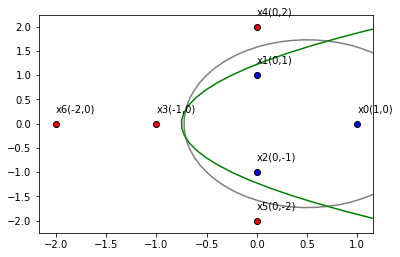

In [11]:
for i, j in enumerate(x):
    t1, t2 = j[0], j[1]
    coordinate = "x%d(%s,%s)\n" % (i, t1, t2)
    if y[i] == 1:
        plt.scatter(t1, t2, c='r', edgecolors='k')
        plt.annotate(coordinate, (t1,t2),  fontsize=10)
    elif y[i] == -1:
        plt.scatter(t1, t2, c='b', edgecolors='k')
        plt.annotate(coordinate, (t1,t2),  fontsize=10)

        
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
ZZ = my_decision_function(xy).reshape(XX.shape)
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
ax.contour(XX, YY, ZZ, colors='g', levels=[0], alpha=1.0,
           linestyles=['-'])


plt.savefig('4.png')
plt.show()